In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
import random
from sklearn.metrics import silhouette_score as ss
from sklearn.metrics import adjusted_rand_score as ars
from sklearn.cluster import KMeans
from itertools import combinations as cb
from sklearn.manifold import SpectralEmbedding as se

In [23]:
random.seed(42)
# rand_num = random.sample(range(0, 101), 25)
rand_num = random.sample(range(100, 201), 25)
rand_num = sorted(rand_num)

In [24]:
# def get_blobs(n_samples=200, centers=4, random_state=42):
#     X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
#     plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()
    
def get_blobs(n_samples=200, centers=4, random_state=42):
    X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
    return X, Y

def get_circles(n_samples=200, centers=4, random_state=42):
    X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
    return X, Y

def get_(n_samples=200, centers=4, random_state=42):
    X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
    return X, Y

In [25]:
def core_routine(X, num_clusters=4):
    # matrices
    A = np.exp(-pairwise_distances(X, metric='euclidean'))
    emb = se(n_components=num_clusters, affinity='precomputed', random_state=42)
    return emb.fit_transform(A)

def get_score(X, Y, method): # ss or ard
    km = KMeans(n_clusters=4, random_state=42).fit(X)
    label_predicted = km.fit_predict(X)
    if method=='ss':
        return ss(X, label_predicted)
    elif method=='ars':
        return ars(Y, label_predicted)

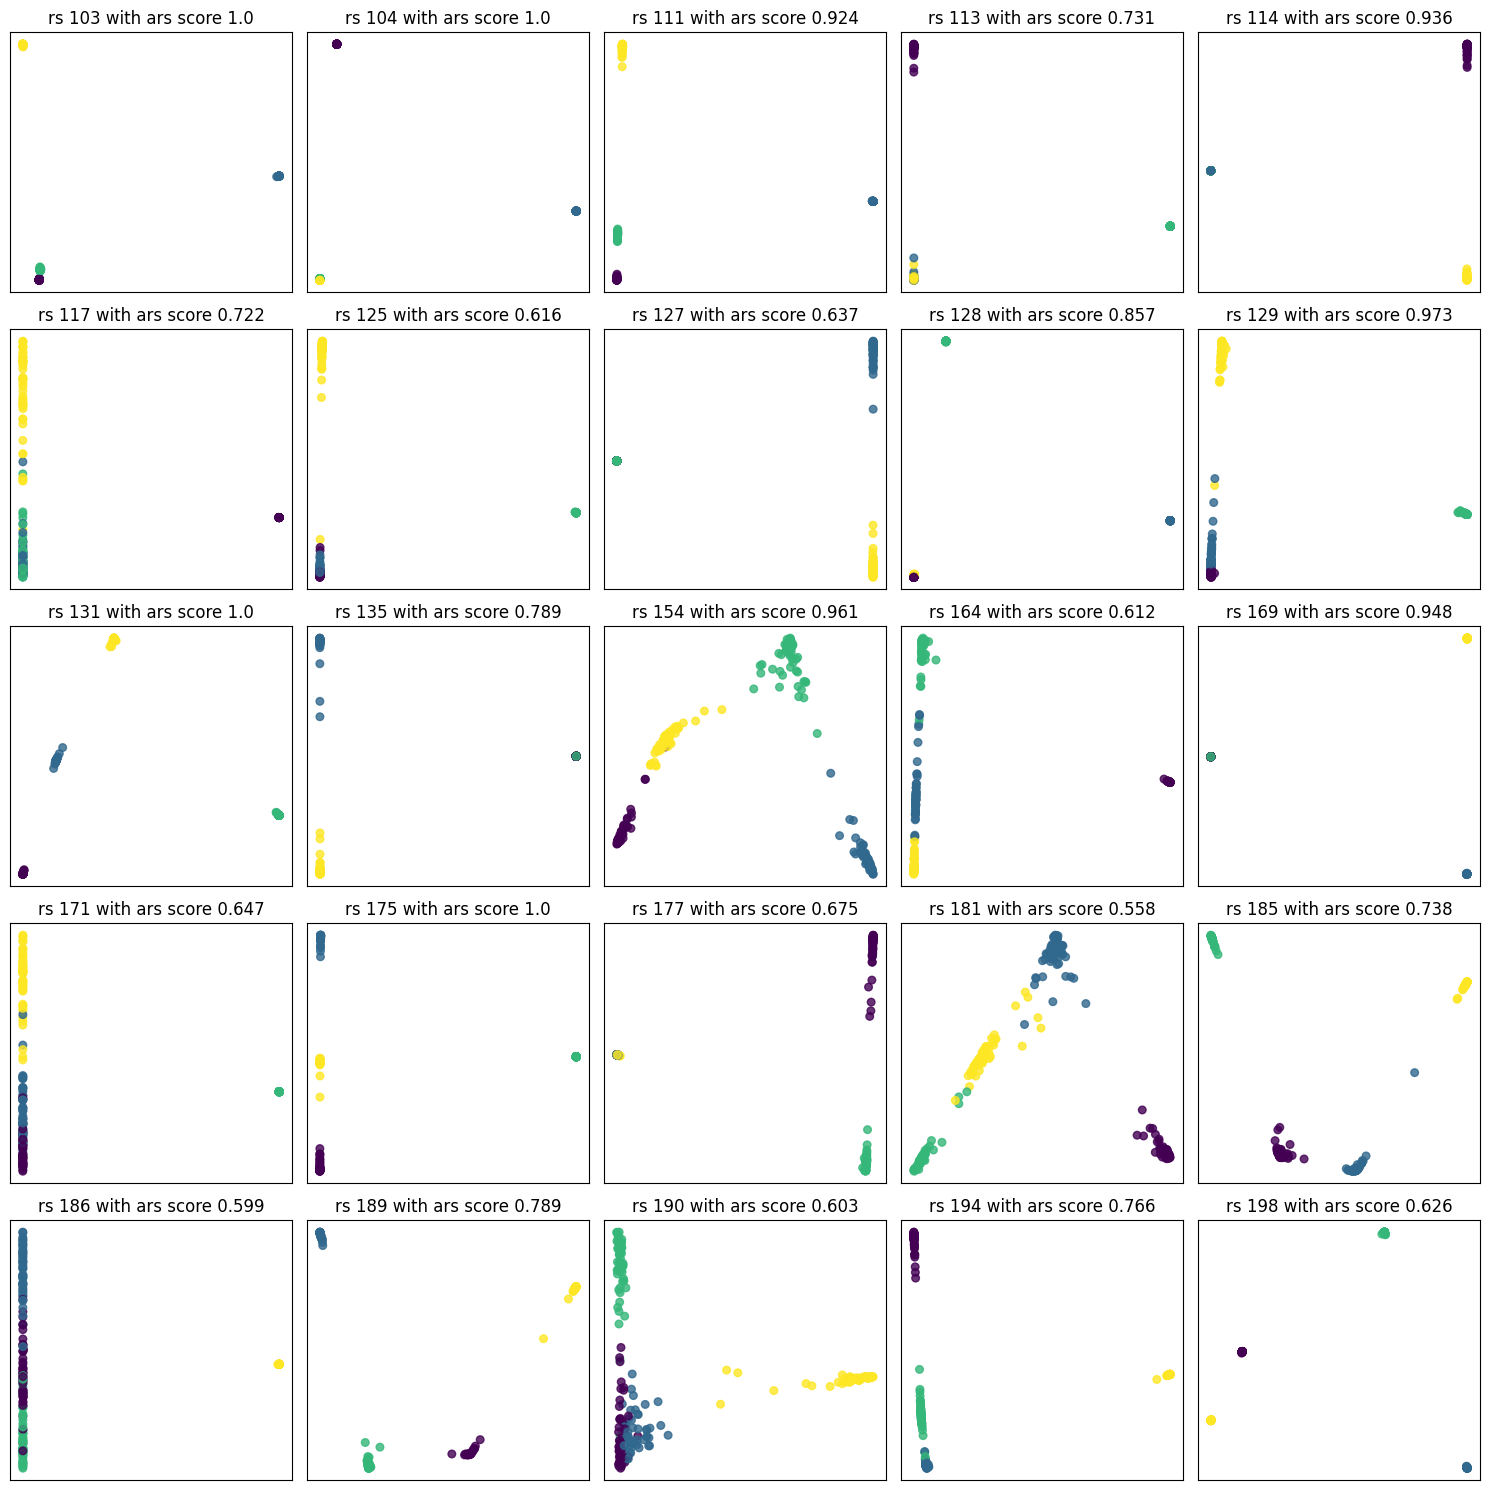

In [26]:
score_list = []

fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid, adjust size as needed
axes = axes.flatten() 

for i, rn in enumerate(rand_num):
    # generate dataset
    X, Y = get_blobs(random_state=rn)
    # core routine to embed data on LE
    X = core_routine(X)
    # get the best indices and corresponding score
    method = 'ars' # or ss
    score = np.round(get_score(X, Y, method),3)
    score_list.append(score)
    # plot
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    ax.set_title(f'rs {rn} with {method} score {score}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [27]:
fig.savefig('rd_plots/sklearn_embedded_100.png')

In [28]:
score_df = pd.DataFrame([rand_num, score_list]).T
score_df.columns = ['random_state','score']
score_df['random_state'] = score_df['random_state'].astype('int')
score_df

,random_state,score
0,103,1.000
1,104,1.000
2,111,0.924
3,113,0.731
4,114,0.936
5,117,0.722
6,125,0.616
7,127,0.637
8,128,0.857
9,129,0.973


In [29]:
score_df.to_csv('rd_plots/sklearn_table_100.csv', index=False)